In [2]:
#loading the important libraries for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
pd.set_option('display.max_columns', None)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
train = pd.read_csv('train_jh.csv')  # loading the train data
train.head()
test = pd.read_csv('test_jh.csv')    # loading the test data

In [0]:
data = train.append(test)     # merging the train and test data

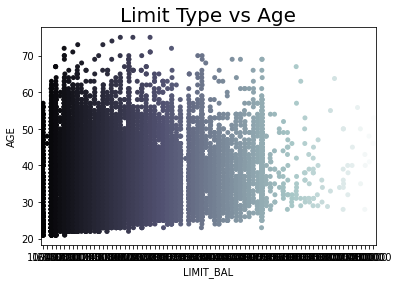

In [0]:
# checking the distribution for the limit balance

sns.stripplot(train['LIMIT_BAL'], train['AGE'], palette = 'bone')
plt.title('Limit Type vs Age', fontsize = 20)
plt.show()

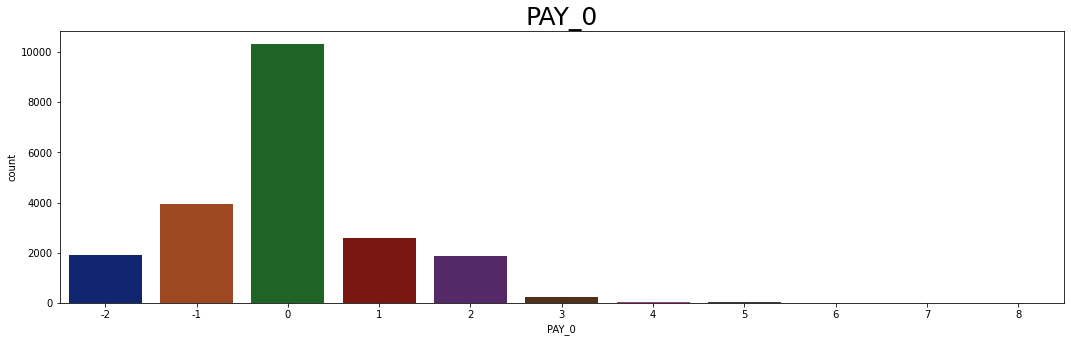

In [0]:
# checking the distribution of variable PAY_0

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['PAY_0'], palette = 'dark')
plt.title('PAY_0', fontsize = 25)
plt.show()


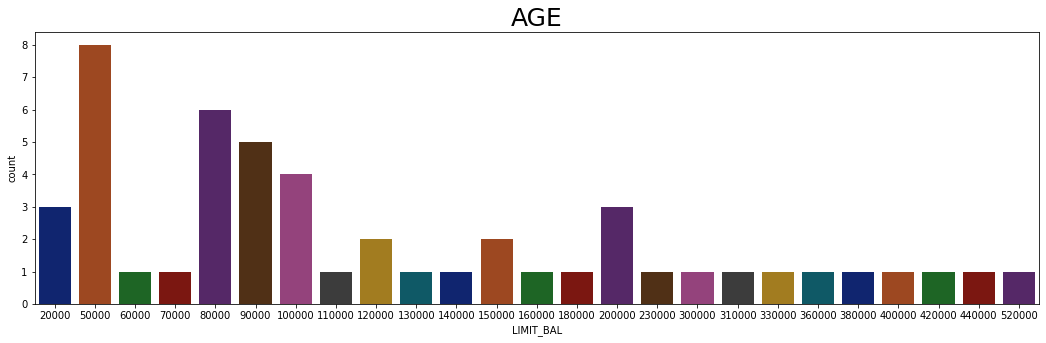

In [0]:
# checking the distribution of LIMIT_BAL variable

plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['LIMIT_BAL'].tail(50), palette = 'dark')
plt.title('AGE', fontsize = 25)
plt.show()

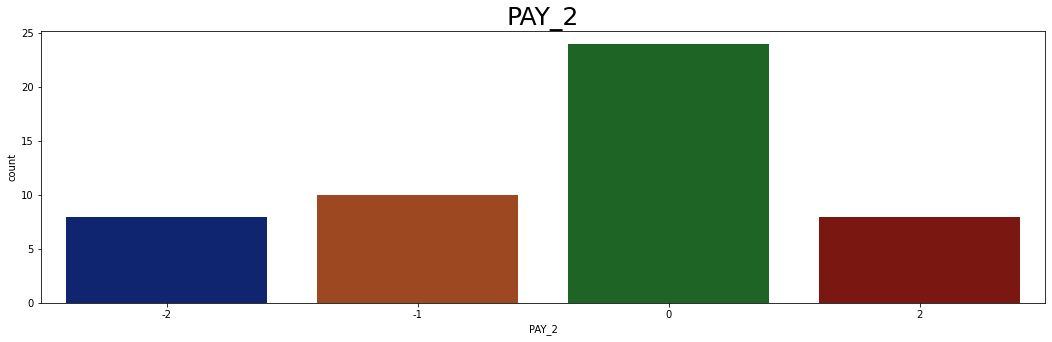

In [0]:
# checking the distribution of PAY_2 variable 
plt.rcParams['figure.figsize'] = (18, 5)
sns.countplot(train['PAY_2'].tail(50), palette = 'dark')
plt.title('PAY_2', fontsize = 25)
plt.show()

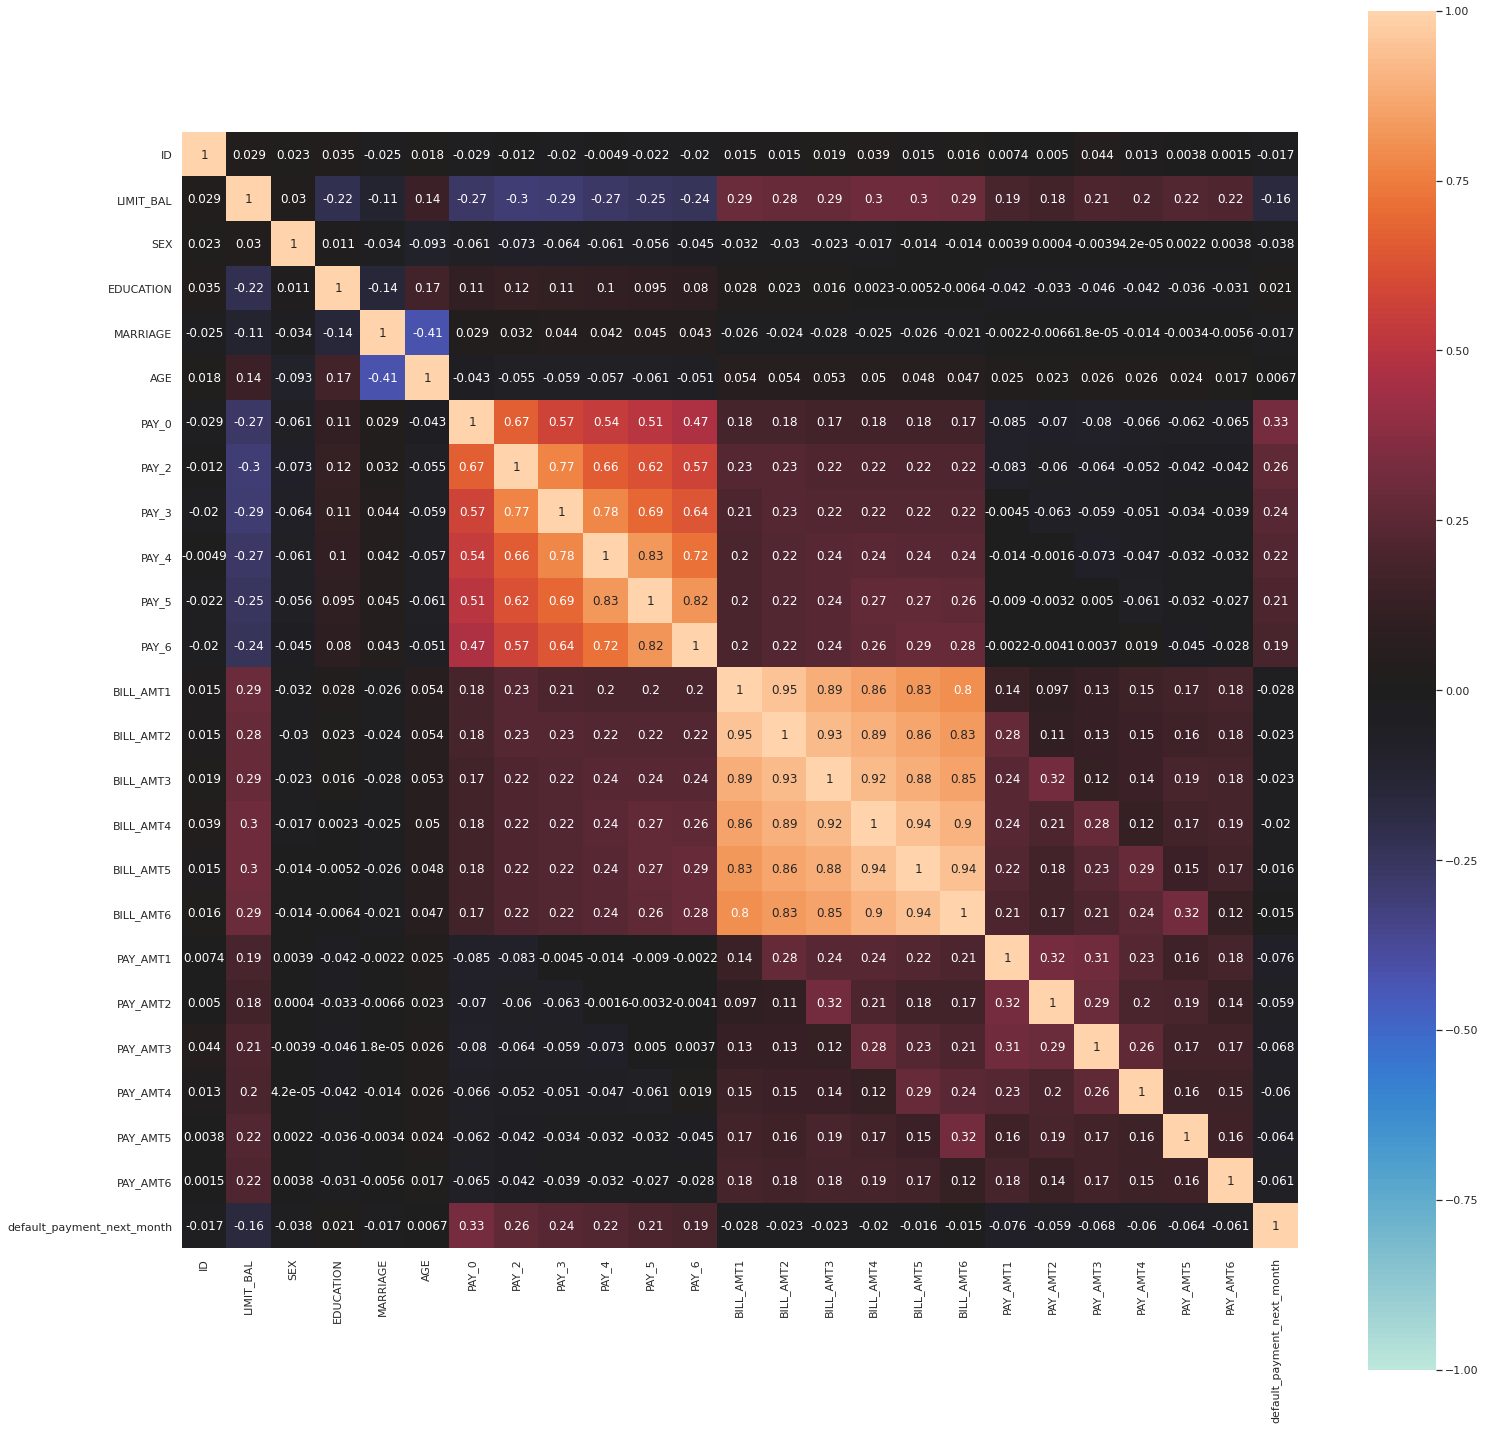

In [0]:
# checking the heatmap for the train data
import seaborn as sns; sns.set()
plt.figure(figsize=(25, 25))
ax = sns.heatmap(train.corr(), vmin=-1, vmax=1, center=0, annot=True, square=True)

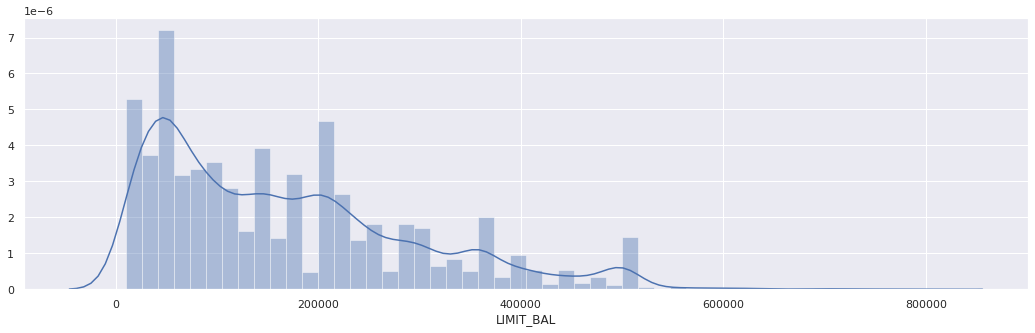

In [0]:
# checking the distribution of LIMIT_BAL Amount of given credit (NT dollars) 
ax = sns.distplot(train['LIMIT_BAL'])
ax.autoscale()
plt.show()

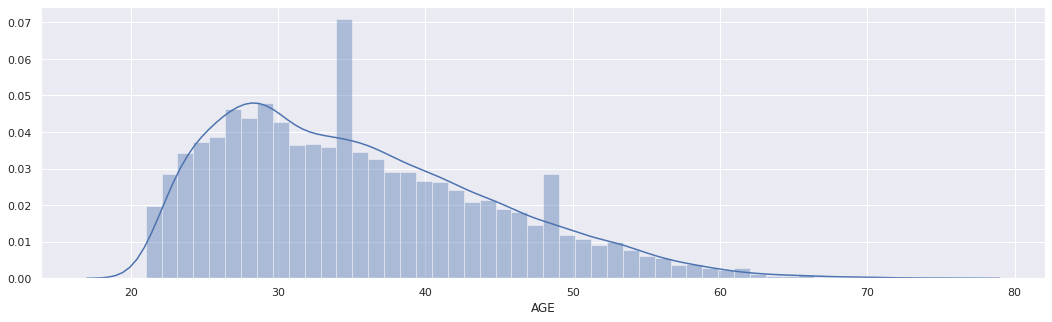

In [0]:
ax = sns.distplot(train['AGE'])
ax.autoscale()
plt.show()

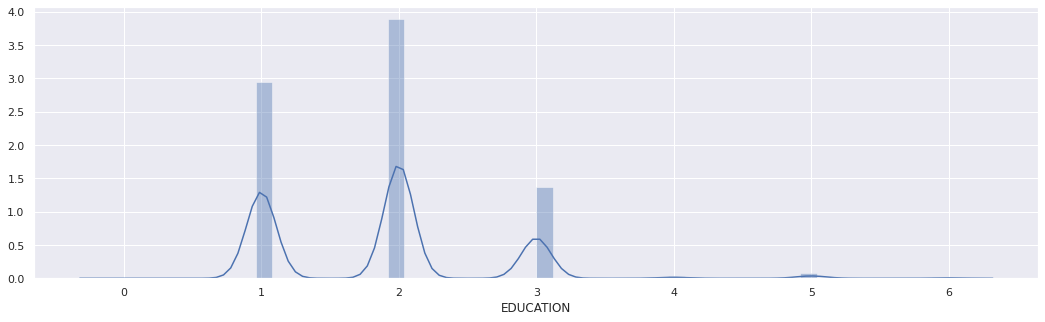

In [0]:
# EDUCATION (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
ax = sns.distplot(train['EDUCATION'])
ax.autoscale()
plt.show()

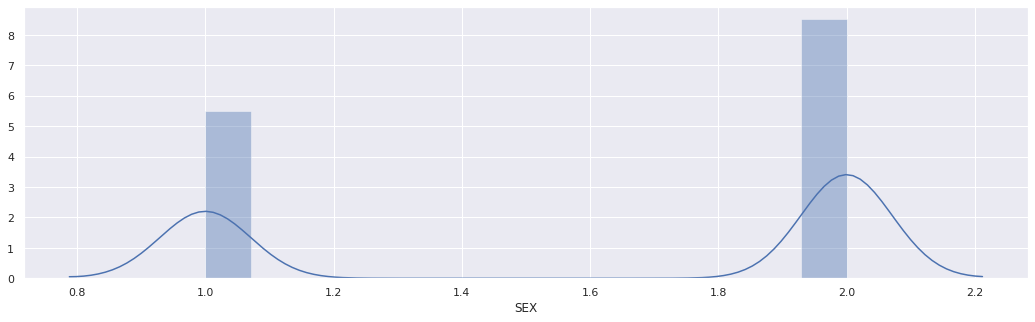

In [0]:
# SEX (1= MALE, 2= FEMALE)
ax = sns.distplot(train['SEX'])
ax.autoscale()
plt.show()

In [0]:
# splitting the data for train and test
x_train = train.iloc[:21000,:]
x_test = train.iloc[21000:,:]

# checking the shape of train and test
print("Shape of train :", x_train.shape)
print("Shape of test :", x_test.shape)

Shape of train : (21000, 25)
Shape of test : (0, 25)


In [0]:
# find correlations to target
corr_matrix = train.corr().abs()
print(corr_matrix['default_payment_next_month'].sort_values(ascending=False).head(10))

default_payment_next_month    1.000000
PAY_0                         0.325851
PAY_2                         0.263546
PAY_3                         0.235930
PAY_4                         0.220079
PAY_5                         0.208783
PAY_6                         0.188985
LIMIT_BAL                     0.159163
PAY_AMT1                      0.076042
PAY_AMT3                      0.067720
Name: default_payment_next_month, dtype: float64


In [0]:
# replacing the values of EDUCATION having numeric values with categorical values as the labels are not given

data['EDUCATION'] = data['EDUCATION'].replace(0, 'Graduate')
data['EDUCATION'] = data['EDUCATION'].replace(1, 'High School')
data['EDUCATION'] = data['EDUCATION'].replace(2, 'University')
data['EDUCATION'] = data['EDUCATION'].replace(3, 'Unknown')
data['EDUCATION'] = data['EDUCATION'].replace(4, 'Unknown')
data['EDUCATION'] = data['EDUCATION'].replace(5, 'Unknown')
data['EDUCATION'] = data['EDUCATION'].replace(6, 'Unknown')

In [0]:
data['MARRIAGE'] = data['MARRIAGE'].replace(0, 'Unknown')
data['MARRIAGE'] = data['MARRIAGE'].replace(1, 'Single')
data['MARRIAGE'] = data['MARRIAGE'].replace(2, 'Married')
data['MARRIAGE'] = data['MARRIAGE'].replace(3, 'Divorced')

In [0]:
# there are many values in the age column converting the various ages into bins

bins= [20,30,40,50,60,70,80]
labels = ['Age_Tier1','Age_Tier2','Age_Tier3','Age_Tier4','Age_Tier5','Age_Tier6']

data['AGE'] = pd.cut(data['AGE'] , bins=bins, labels=labels, right=True)

In [0]:
# replacing the PAY_0 variable with values that makes sense as the given values are all numeric without any label 

data['PAY_0'] = data['PAY_0'].replace(0, "Paid_On_Time")
data['PAY_0'] = data['PAY_0'].replace(-1, "Duly_1")
data['PAY_0'] = data['PAY_0'].replace(1, "Delay_1")
data['PAY_0'] = data['PAY_0'].replace(-2, "Duly_2")
data['PAY_0'] = data['PAY_0'].replace(2, "Delay_2")
data['PAY_0'] = data['PAY_0'].replace(3, "Delay_3")
data['PAY_0'] = data['PAY_0'].replace(4, "Delay_4")
data['PAY_0'] = data['PAY_0'].replace(5, "Delay_5")
data['PAY_0'] = data['PAY_0'].replace(8, "Delay_8")
data['PAY_0'] = data['PAY_0'].replace(6, "Delay_6")
data['PAY_0'] = data['PAY_0'].replace(7, "Delay_7")
data['PAY_0'].value_counts()

Paid_On_Time    14737
Duly_1           5686
Delay_1          3688
Duly_2           2759
Delay_2          2667
Delay_3           322
Delay_4            76
Delay_5            26
Delay_8            19
Delay_6            11
Delay_7             9
Name: PAY_0, dtype: int64

In [0]:
# changing the values of PAY_2 variable as the given values are all numeric without any label 

data['PAY_2'] = data['PAY_2'].replace(0, "Paid_On_Time")
data['PAY_2'] = data['PAY_2'].replace(-1, "Duly_1")
data['PAY_2'] = data['PAY_2'].replace(1, "Delay_1")
data['PAY_2'] = data['PAY_2'].replace(-2, "Duly_2")
data['PAY_2'] = data['PAY_2'].replace(2, "Delay_2")
data['PAY_2'] = data['PAY_2'].replace(3, "Delay_3")
data['PAY_2'] = data['PAY_2'].replace(4, "Delay_4")
data['PAY_2'] = data['PAY_2'].replace(5, "Delay_5")
data['PAY_2'] = data['PAY_2'].replace(8, "Delay_8")
data['PAY_2'] = data['PAY_2'].replace(6, "Delay_6")
data['PAY_2'] = data['PAY_2'].replace(7, "Delay_7")
data['PAY_2'].value_counts()

Paid_On_Time    15730
Duly_1           6050
Delay_2          3927
Duly_2           3782
Delay_3           326
Delay_4            99
Delay_1            28
Delay_5            25
Delay_7            20
Delay_6            12
Delay_8             1
Name: PAY_2, dtype: int64

In [0]:
# changing the feature PAY_6 to respective values as the given values are all numeric without any label 

data['PAY_6'] = data['PAY_6'].replace(0, "Paid_On_Time")
data['PAY_6'] = data['PAY_6'].replace(-1, "Duly_1")
data['PAY_6'] = data['PAY_6'].replace(1, "Delay_1")
data['PAY_6'] = data['PAY_6'].replace(-2, "Duly_2")
data['PAY_6'] = data['PAY_6'].replace(2, "Delay_2")
data['PAY_6'] = data['PAY_6'].replace(3, "Delay_3")
data['PAY_6'] = data['PAY_6'].replace(4, "Delay_4")
data['PAY_6'] = data['PAY_6'].replace(5, "Delay_5")
data['PAY_6'] = data['PAY_6'].replace(8, "Delay_8")
data['PAY_6'] = data['PAY_6'].replace(6, "Delay_6")
data['PAY_6'] = data['PAY_6'].replace(7, "Delay_7")
data['PAY_6'].value_counts()

Paid_On_Time    16286
Duly_1           5740
Duly_2           4895
Delay_2          2766
Delay_3           184
Delay_4            49
Delay_7            46
Delay_6            19
Delay_5            13
Delay_8             2
Name: PAY_6, dtype: int64

In [0]:
# changing the feature PAY_3 as the given values are all numeric without any label 

data['PAY_3'] = data['PAY_3'].replace(0, "Paid_On_Time")
data['PAY_3'] = data['PAY_3'].replace(-1, "Duly_1")
data['PAY_3'] = data['PAY_3'].replace(1, "Delay_1")
data['PAY_3'] = data['PAY_3'].replace(-2, "Duly_2")
data['PAY_3'] = data['PAY_3'].replace(2, "Delay_2")
data['PAY_3'] = data['PAY_3'].replace(3, "Delay_3")
data['PAY_3'] = data['PAY_3'].replace(4, "Delay_4")
data['PAY_3'] = data['PAY_3'].replace(5, "Delay_5")
data['PAY_3'] = data['PAY_3'].replace(8, "Delay_8")
data['PAY_3'] = data['PAY_3'].replace(6, "Delay_6")
data['PAY_3'] = data['PAY_3'].replace(7, "Delay_7")
data['PAY_3'].value_counts()

Paid_On_Time    15764
Duly_1           5938
Duly_2           4085
Delay_2          3819
Delay_3           240
Delay_4            76
Delay_7            27
Delay_6            23
Delay_5            21
Delay_1             4
Delay_8             3
Name: PAY_3, dtype: int64

In [0]:
# changing the feature PAY_4 to their respective values as the given values are all numeric without any label 

data['PAY_4'] = data['PAY_4'].replace(0, "Paid_On_Time")
data['PAY_4'] = data['PAY_4'].replace(-1, "Duly_1")
data['PAY_4'] = data['PAY_4'].replace(1, "Delay_1")
data['PAY_4'] = data['PAY_4'].replace(-2, "Duly_2")
data['PAY_4'] = data['PAY_4'].replace(2, "Delay_2")
data['PAY_4'] = data['PAY_4'].replace(3, "Delay_3")
data['PAY_4'] = data['PAY_4'].replace(4, "Delay_4")
data['PAY_4'] = data['PAY_4'].replace(5, "Delay_5")
data['PAY_4'] = data['PAY_4'].replace(8, "Delay_8")
data['PAY_4'] = data['PAY_4'].replace(6, "Delay_6")
data['PAY_4'] = data['PAY_4'].replace(7, "Delay_7")
data['PAY_4'].value_counts()

Paid_On_Time    16455
Duly_1           5687
Duly_2           4348
Delay_2          3159
Delay_3           180
Delay_4            69
Delay_7            58
Delay_5            35
Delay_6             5
Delay_8             2
Delay_1             2
Name: PAY_4, dtype: int64

In [0]:
# changing the values of PAY_5 variable to respective values as the given values are all numeric without any label 

data['PAY_5'] = data['PAY_5'].replace(0,'Paid_on_Time')
data['PAY_5'] = data['PAY_5'].replace(-1, "Duly_1")
data['PAY_5'] = data['PAY_5'].replace(1, "Delay_1")
data['PAY_5'] = data['PAY_5'].replace(-2, "Duly_2")
data['PAY_5'] = data['PAY_5'].replace(2, "Delay_2")
data['PAY_5'] = data['PAY_5'].replace(3, "Delay_3")
data['PAY_5'] = data['PAY_5'].replace(4, "Delay_4")
data['PAY_5'] = data['PAY_5'].replace(5, "Delay_5")
data['PAY_5'] = data['PAY_5'].replace(8, "Delay_8")
data['PAY_5'] = data['PAY_5'].replace(6, "Delay_6")
data['PAY_5'] = data['PAY_5'].replace(7, "Delay_7")
data['PAY_5'].value_counts()

Paid_on_Time    16947
Duly_1           5539
Duly_2           4546
Delay_2          2626
Delay_3           178
Delay_4            84
Delay_7            58
Delay_5            17
Delay_6             4
Delay_8             1
Name: PAY_5, dtype: int64

In [0]:
# converting the bill amount with bins of 6 counts
bill_amount = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
data[bill_amount].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000
mean,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400
std,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537
min,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000
25%,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000
50%,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000
75%,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000
max,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000


In [0]:
# standardizing the bill_amount variable and transforming them to fit the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data[bill_amount] = scaler.fit_transform(data[bill_amount])
data[bill_amount].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04,3.000000e+04
mean,-3.769308e-17,4.823283e-17,3.031385e-16,-5.507724e-17,9.425377e-17,-8.530075e-17
std,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00,1.000017e+00
min,-2.944312e+00,-1.671375e+00,-2.945672e+00,-3.315048e+00,-2.000874e+00,-6.355247e+00
25%,-6.473120e-01,-6.490466e-01,-6.394814e-01,-6.363293e-01,-6.340600e-01,-6.316338e-01
50%,-3.916884e-01,-3.931159e-01,-3.882529e-01,-3.763451e-01,-3.652683e-01,-3.660725e-01
75%,2.154919e-01,2.083271e-01,1.896457e-01,1.747667e-01,1.624955e-01,1.733997e-01
max,1.240296e+01,1.313360e+01,2.331820e+01,1.318669e+01,1.458743e+01,1.549528e+01


In [0]:
# standardizing the bill_amount variable and transforming them to fit the data

pay_amount = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
data[pay_amount].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [0]:
# generating dummy features for the data

data = pd.get_dummies(data)
data.shape

(30000, 94)

In [0]:
#defining X and Y for the split and analysis

X = data[data['default_payment_next_month'].isnull()!=True].drop(['ID','default_payment_next_month'], axis=1)
y = data[data['default_payment_next_month'].isnull()!=True]['default_payment_next_month']

X_test = data[data['default_payment_next_month'].isnull()==True].drop(['ID','default_payment_next_month'], axis=1)

X.shape, y.shape, X_test.shape

((21000, 92), (21000,), (9000, 92))

In [0]:
# from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

In [0]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=20,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=20,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
model.fit(x_train,y_train)

pred_y = model.predict_proba(x_val)[:,1]

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


In [0]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
print(roc_auc_score(y_val, pred_y))
confusion_matrix(y_val,pred_y>0.5)

0.7402827357891546


array([[3221,  101],
       [ 627,  251]])

In [0]:
# lgb algorithm

from lightgbm import LGBMClassifier
model = LGBMClassifier(n_estimator=5000,
                       random_state=1994,
                       learning_rate=0.05,
                       reg_alpha=0.2,
                       colsample_bytree=0.5,
                       bagging_fraction=0.9)

model.fit(x_train,y_train,
          eval_set=[(x_train,y_train),(x_val, y_val.values)],
          eval_metric='auc',
          early_stopping_rounds=100,
          verbose=200)

pred_y = model.predict_proba(x_val)[:,1]

Training until validation scores don't improve for 100 rounds.
Did not meet early stopping. Best iteration is:
[100]	training's binary_logloss: 0.383971	training's auc: 0.853705	valid_1's binary_logloss: 0.410343	valid_1's auc: 0.791459


In [0]:
# checking the accuracy for the data
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score
print(roc_auc_score(y_val, pred_y))
confusion_matrix(y_val,pred_y>0.5)

0.7914592987455754


array([[3177,  145],
       [ 581,  297]])

In [0]:
# using the Straified K Fold and applying lgbm for analysis
err = []
y_pred_tot_lgm = []

from sklearn.model_selection import StratifiedKFold

fold = StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i = 1
for train_index, test_index in fold.split(X, y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = LGBMClassifier(boosting_type='gbdt',
                       max_depth=5,
                       learning_rate=0.08,
                       n_estimators=5000,
                       min_child_weight=0.01,
                       colsample_bytree=0.5,
                       random_state=1990)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='auc',
          verbose=200)
    pred_y = m.predict_proba(x_val)[:,1]
    print("err_lgm: ",roc_auc_score(y_val,pred_y))
    err.append(roc_auc_score(y_val, pred_y))
    pred_test = m.predict_proba(X_test)[:,1]
    i = i + 1
    y_pred_tot_lgm.append(pred_test)

Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.355861	training's auc: 0.878371	valid_1's binary_logloss: 0.429799	valid_1's auc: 0.783651
Early stopping, best iteration is:
[91]	training's binary_logloss: 0.386995	training's auc: 0.838636	valid_1's binary_logloss: 0.426588	valid_1's auc: 0.787519
err_lgm:  0.7875185745299721
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.362011	training's auc: 0.871744	valid_1's binary_logloss: 0.420106	valid_1's auc: 0.795335
Early stopping, best iteration is:
[49]	training's binary_logloss: 0.403777	training's auc: 0.817759	valid_1's binary_logloss: 0.416192	valid_1's auc: 0.80159
err_lgm:  0.8015904276620858
Training until validation scores don't improve for 200 rounds.
[200]	training's binary_logloss: 0.357496	training's auc: 0.876663	valid_1's binary_logloss: 0.421287	valid_1's auc: 0.795281
Early stopping, best iteration is:
[142]	training's bina

In [0]:
from xgboost import XGBClassifier

errxgb = []
y_pred_tot_xgb = []

from sklearn.model_selection import KFold,StratifiedKFold

fold = StratifiedKFold(n_splits=10,shuffle=True,random_state=1994)
i = 1
for train_index, test_index in fold.split(X,y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = XGBClassifier(boosting_type='gbdt',
                      max_depth=5,
                      learning_rate=0.07,
                      n_estimators=5000,
                      random_state=1990)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          eval_metric='auc',
          verbose=200)
    pred_y = m.predict_proba(x_val)[:,-1]
    print("err_xgb: ",roc_auc_score(y_val,pred_y))
    errxgb.append(roc_auc_score(y_val, pred_y))
    pred_test = m.predict_proba(X_test)[:,-1]
    i = i + 1
    y_pred_tot_xgb.append(pred_test)

[0]	validation_0-auc:0.757478	validation_1-auc:0.758326
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.871831	validation_1-auc:0.786515
Stopping. Best iteration:
[103]	validation_0-auc:0.8386	validation_1-auc:0.789505

err_xgb:  0.7895051270972093
[0]	validation_0-auc:0.756191	validation_1-auc:0.767467
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_0-auc:0.865655	validation_1-auc:0.797401
Stopping. Best iteration:
[48]	validation_0-auc:0.812161	validation_1-auc:0.804764

err_xgb:  0.8047639058679706
[0]	validation_0-auc:0.757094	validation_1-auc:0.762602
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[200]	validation_

In [0]:
from catboost import CatBoostClassifier,Pool, cv
errCB = []
y_pred_tot_cb = []
from sklearn.model_selection import KFold,StratifiedKFold

fold = StratifiedKFold(n_splits=15,shuffle=True,random_state=1994)
i = 1
for train_index, test_index in fold.split(X,y):
    x_train, x_val = X.iloc[train_index], X.iloc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    m = CatBoostClassifier(n_estimators=5000,
                           random_state=1990,
                           eval_metric='AUC',
                           learning_rate=0.03)
    m.fit(x_train, y_train,
          eval_set=[(x_train,y_train),(x_val, y_val)],
          early_stopping_rounds=200,
          verbose=200)
    pred_y = m.predict_proba(x_val)[:,-1]
    print("err_cb: ",roc_auc_score(y_val,pred_y))
    errCB.append(roc_auc_score(y_val,pred_y))
    pred_test = m.predict_proba(X_test)[:,-1]
    i = i + 1
    y_pred_tot_cb.append(pred_test)

0:	test: 0.7481426	test1: 0.7619372	best: 0.7619372 (0)	total: 64.5ms	remaining: 5m 22s
200:	test: 0.8044578	test1: 0.7854778	best: 0.7859109 (179)	total: 3.04s	remaining: 1m 12s
400:	test: 0.8271059	test1: 0.7883626	best: 0.7884338 (399)	total: 5.98s	remaining: 1m 8s
600:	test: 0.8483498	test1: 0.7887037	best: 0.7887541 (515)	total: 8.91s	remaining: 1m 5s
800:	test: 0.8642908	test1: 0.7873066	best: 0.7888431 (613)	total: 11.9s	remaining: 1m 2s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.7888431088
bestIteration = 613

Shrink model to first 614 iterations.
err_cb:  0.7888431088132084
0:	test: 0.7311123	test1: 0.7368185	best: 0.7368185 (0)	total: 15.1ms	remaining: 1m 15s
200:	test: 0.8032818	test1: 0.8027047	best: 0.8027047 (200)	total: 3.01s	remaining: 1m 11s
400:	test: 0.8261204	test1: 0.8034196	best: 0.8037696 (357)	total: 5.97s	remaining: 1m 8s
Stopped by overfitting detector  (200 iterations wait)

bestTest = 0.8037695888
bestIteration = 357

Shrink model t

In [0]:
# checking the mean error accuracy 
(np.mean(errxgb, 0) + np.mean(err, 0) + np.mean(errCB, 0))/3

0.7863387026213706

In [5]:
models = [
    #ensemble
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    GradientBoostingClassifier(),
    RandomForestClassifier(),
    
    #linear models
    LogisticRegression(),
          
    XGBClassifier(),
    LGBMClassifier(),
    CatBoostClassifier()
         ]

NameError: ignored